# Unit 5 - Financial Planning

In [22]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [23]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [24]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [25]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [26]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_json = btc_response.json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_json = eth_response.json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of my {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of my {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of my 1.2 BTC is $73802.40
The current value of my 5.3 ETH is $22846.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [27]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [30]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [31]:
type(alpaca_key)

str

In [32]:

api = tradeapi.REST(
   alpaca_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [35]:
# Create the Alpaca API object
                              
alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_secret_key, api_version="v2")

In [140]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'NoneType'>
Alpaca Secret Key type: <class 'NoneType'>


In [49]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-10-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000
   ).df
# Drop all nulls

df_portfolio=df_portfolio.dropna()
# Preview DataFrame
df_portfolio

AGG                                         SPY  \
                             open     high      low    close   volume    open   
time                                                                            
2017-11-09 00:00:00-05:00  109.39  109.460  109.300  109.420  1941380  257.73   
2017-11-10 00:00:00-05:00  109.06  109.150  108.970  108.985  1488306  257.73   
2017-11-13 00:00:00-05:00  109.11  109.110  108.960  108.980  1677797  257.32   
2017-11-14 00:00:00-05:00  109.01  109.120  109.000  109.105  2663310  257.40   
2017-11-15 00:00:00-05:00  109.26  109.380  109.140  109.330  1959296  256.62   
...                           ...      ...      ...      ...      ...     ...   
2021-10-25 00:00:00-04:00  114.06  114.270  114.060  114.170  7088133  454.28   
2021-10-26 00:00:00-04:00  114.25  114.380  114.110  114.370  5284755  457.20   
2021-10-27 00:00:00-04:00  114.66  114.915  114.425  114.770  6817074  456.45   
2021-10-28 00:00:00-04:00  114.71  114.825  114.570  114.650  4971007  455.46   
2021-10-29 00:00:00-04:00  114.35  114.780  114.350  114.620  7051614  455.87   

                                                               
                               high     low   close    volume  
time                                                           
2017-11-09 00:00:00-05:00  258.3900  256.36  258.20  75322217  
2017-11-10 00:00:00-05:00  258.2100  257.37  258.08  35755951  
2017-11-13 00:00:00-05:00  258.5900  257.27  258.34  31963013  
2017-11-14 00:00:00-05:00  258.3581  256.52  257.75  41935632  
2017-11-15 00:00:00-05:00  257.2200  255.63  256.43  55509843  
...                             ...     ...     ...       ...  
2021-10-25 00:00:00-04:00  455.9000  452.39  455.48  37918548  
2021-10-26 00:00:00-04:00  458.4900  455.56  455.97  49865704  
2021-10-27 00:00:00-04:00  457.1600  453.86  453.92  48219255  
2021-10-28 00:00:00-04:00  458.4000  455.45  458.27  43081788  
2021-10-29 00:00:00-04:00  459.5600  455.56  459.22  58813207  

[1000 rows x 10 columns]

In [50]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $109.42
Current SPY closing price: $258.2


In [52]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of my  {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of my  {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of my  50 SPY shares is $12910.00
The current value of my  200 AGG shares is $21884.00


### Savings Health Analysis

In [56]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
asset_data = [ total_crypto, total_shares]


# Create savings DataFrame
df_savings = pd.DataFrame(asset_data, index=['Crypto','Shares'], columns=['Value'])

# Display savings DataFrame
df_savings

,Value
Crypto,96649.216
Shares,34794.000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Value'>

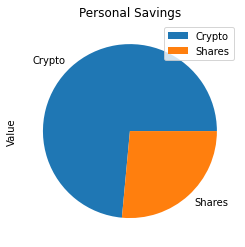

In [57]:
# Plot savings pie chart
df_savings.plot.pie(y='Value',title='Personal Savings')

In [58]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in this fund")
elif (total_savings == emergency_fund):
    print("Congratualtions on reaching this financial goal!")
else:
    diff = emergency_fund - total_savings
    print(f"You are ${diff} away from reaching your financial goal")

Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [59]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [62]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_share_data_1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end= end_date,
    limit=1000
).df

next_start_date = pd.Timestamp('2016-04-17', tz='America/New_York').isoformat()
next_end_date = pd.Timestamp('2017-04-25', tz='America/New_York').isoformat()

df_share_data_2 = api.get_barset(
    tickers,
    timeframe,
    start=next_start_date,
    end=next_end_date,
    limit=1000
).df

df_share_data = pd.concat([df_share_data_1, df_share_data_2])

# Display sample data
df_share_data=df_share_data.dropna()
df_share_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                              SPY                                        
                             open    high     low    close       volume  
time                                                                     
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183.0  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594.0

In [63]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_shares_dist = MCSimulation(
    portfolio_data = df_share_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [66]:
# Printing the simulation input data
# Drop all nulls 

MC_shares_dist.portfolio_data.dropna()


AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
...                           ...       ...       ...      ...        ...   
2017-04-19 00:00:00-04:00  109.47  109.5600  109.3900  109.470  1986888.0   
2017-04-20 00:00:00-04:00  109.31  109.4000  109.2000  109.300  1738089.0   
2017-04-21 00:00:00-04:00  109.40  109.4899  109.3000  109.330  1388470.0   
2017-04-24 00:00:00-04:00  109.05  109.2200  109.0000  109.170  1945439.0   
2017-04-25 00:00:00-04:00  108.99  109.0450  108.7700  108.805  1717302.0   

                                           SPY                            \
                          daily_return    open     high     low    close   
time                                                                       
2017-05-12 00:00:00-04:00     0.003732  239.09  239.210  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.440  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.670  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.640  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.750  235.43  236.670   
...                                ...     ...      ...     ...      ...   
2017-04-19 00:00:00-04:00    -0.001778  234.52  234.950  233.18  233.470   
2017-04-20 00:00:00-04:00    -0.001553  234.15  235.845  233.78  235.300   
2017-04-21 00:00:00-04:00     0.000274  235.25  235.310  234.13  234.590   
2017-04-24 00:00:00-04:00    -0.001463  237.18  237.410  236.61  237.120   
2017-04-25 00:00:00-04:00    -0.003343  237.91  238.950  237.81  238.530   

                                                     
                                volume daily_return  
time                                                 
2017-05-12 00:00:00-04:00   35283567.0    -0.001587  
2017-05-15 00:00:00-04:00   42230620.0     0.005083  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701  
2017-05-18 00:00:00-04:00   82965499.0     0.003477  
...                                ...          ...  
2017-04-19 00:00:00-04:00   53760209.0    -0.001668  
2017-04-20 00:00:00-04:00   65462557.0     0.007838  
2017-04-21 00:00:00-04:00   54056385.0    -0.003017  
2017-04-24 00:00:00-04:00   72965789.0     0.010785  
2017-04-25 00:00:00-04:00   55736881.0     0.005946  

[1256 rows x 12 columns]

In [67]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_shares_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009276,1.003005,0.977656,1.007557,1.040893,0.996268,1.012618,0.984628,1.013663,0.995685,...,1.003644,0.990289,0.997847,1.006719,1.008466,0.990907,0.992911,0.987103,1.011588,1.008104
2,1.011712,1.004132,0.975978,0.993962,1.054670,1.004765,1.024115,0.993159,1.009882,1.001035,...,1.011418,0.983056,0.998527,0.995791,0.984054,0.985122,1.008287,0.995533,1.001103,1.005277
3,1.007896,0.977577,0.972580,1.005621,1.038555,1.001677,1.001456,1.000736,1.010577,1.009202,...,1.008701,0.965744,0.988765,1.006662,0.992108,0.998689,1.008415,0.991229,0.996647,0.990498
4,1.008044,0.969541,0.957498,1.021521,1.030955,0.980394,1.010819,0.977170,0.999231,1.006808,...,1.004899,0.963788,0.993208,1.001920,0.984845,0.999240,1.009519,0.993983,1.001747,1.007398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.590229,4.477485,0.731643,1.509745,1.234856,0.833977,3.792537,0.837526,2.195850,0.675735,...,9.291076,4.929449,2.358387,2.873817,2.065971,2.271497,1.316455,0.543977,0.524511,7.929785
7557,7.612915,4.450003,0.724976,1.504687,1.201462,0.827498,3.821103,0.847333,2.192221,0.673932,...,9.276085,4.907335,2.349255,2.886949,2.068505,2.219027,1.310197,0.540508,0.537985,8.014712
7558,7.654148,4.511490,0.730695,1.484905,1.187217,0.820626,3.742970,0.854415,2.173611,0.679111,...,9.378279,4.937025,2.347597,2.896834,2.085821,2.250866,1.279476,0.535165,0.540127,7.915648
7559,7.642191,4.486547,0.737765,1.475302,1.201188,0.812579,3.718995,0.855135,2.192415,0.681626,...,9.394033,4.913796,2.377126,2.901618,2.060835,2.224113,1.234670,0.536724,0.550538,7.949846


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

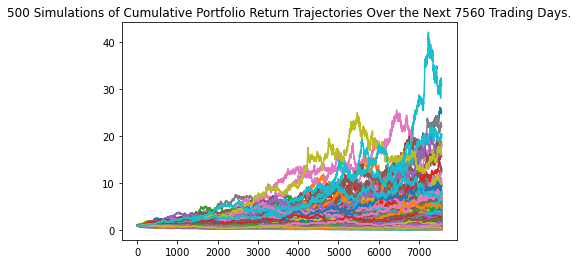

In [68]:
# Plot simulation outcomes
MC_shares_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

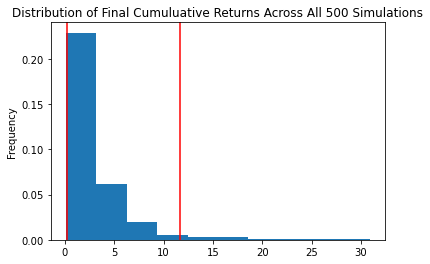

In [69]:
# Plot probability distribution and confidence intervals
MC_shares_dist.plot_distribution()

### Retirement Analysis

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
Summary = MC_shares_dist.summarize_cumulative_return()

# Print summary statistics
Summary

count           500.000000
mean              2.848851
std               3.450577
min               0.092233
25%               0.864492
50%               1.669421
75%               3.601496
max              30.913565
95% CI Lower      0.235351
95% CI Upper     11.643278
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [82]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_5 = round(Summary[8]*initial_investment, 2)
ci_upper_5 = round(Summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $7060.54 and $349298.33


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [83]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(Summary[8]*initial_investment, 2)
ci_upper = round(Summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $7060.54 and $349298.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [84]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_shares_5 = MCSimulation(
    portfolio_data = df_share_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [75]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_shares_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008367,0.989931,1.015129,0.983117,1.001415,0.993203,0.999339,0.977219,1.003989,0.985767,...,1.025364,0.991192,0.979484,0.994430,1.000326,1.017464,0.988939,0.992834,1.005355,1.001036
2,1.019266,0.976397,1.021728,0.994979,0.999150,0.983326,0.990293,0.988719,1.003035,0.979663,...,1.029106,0.988967,0.982291,0.981956,0.996043,1.032594,0.995589,1.004014,1.013979,0.991255
3,1.024972,0.993728,1.037700,1.019836,1.020194,0.968490,0.989844,1.008996,1.025400,0.984349,...,1.024901,0.982962,0.979862,0.976555,1.001431,1.022070,0.993265,1.009091,1.018136,0.997515
4,1.019600,0.975031,1.022052,1.030657,1.002561,0.951205,1.000832,1.011333,1.047211,0.986350,...,1.014382,0.963994,0.966242,0.966810,0.988060,1.015142,0.967784,0.998620,1.039982,0.975095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.759448,1.260991,0.299904,1.274261,1.836723,1.010903,0.676824,0.538428,1.711121,0.574854,...,2.827566,7.370030,1.966988,1.051212,1.118772,1.264502,2.764478,2.669067,1.207070,3.887608
1257,0.772465,1.272593,0.307676,1.229620,1.822298,1.013720,0.676708,0.540929,1.724817,0.567551,...,2.845126,7.281664,1.982781,1.045592,1.109359,1.266796,2.769601,2.654968,1.237115,3.818695
1258,0.781301,1.287912,0.308999,1.210955,1.850089,1.025074,0.681535,0.543076,1.689845,0.571681,...,2.829754,7.220178,1.993243,1.032521,1.099836,1.288459,2.755374,2.612928,1.263915,3.822867
1259,0.761637,1.239426,0.307677,1.229709,1.875287,1.037276,0.655055,0.547948,1.714185,0.560815,...,2.808680,7.322898,1.993322,1.031828,1.109764,1.278848,2.707613,2.592698,1.227500,3.663984


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

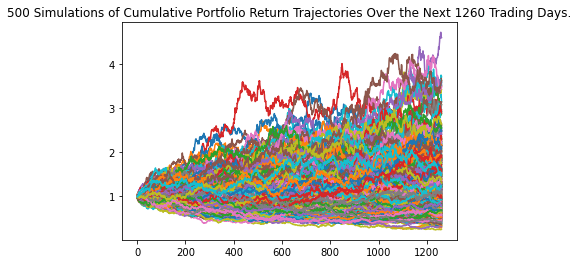

In [87]:
# Plot simulation outcomes
MC_shares_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

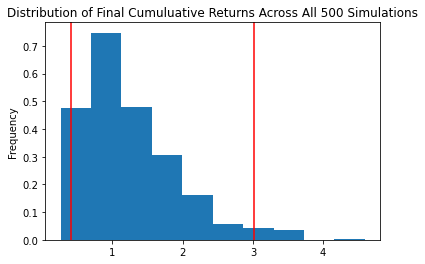

In [95]:
# Plot probability distribution and confidence intervals
MC_shares_5.plot_distribution()

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
Summary_1 = MC_shares_5.summarize_cumulative_return()

# Print summary statistics
Summary_1

count           500.000000
mean              1.239817
std               0.671529
min               0.259842
25%               0.762765
50%               1.058718
75%               1.572966
max               4.593715
95% CI Lower      0.412709
95% CI Upper      3.020869
Name: 1260, dtype: float64

In [97]:
# Set initial investment
initial_investment_5 = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(Summary[8]*initial_investment_5, 2)
ci_upper_5 = round(Summary[9]*initial_investment_5, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $14121.07 and $698596.65


### Ten Years Retirement Option

In [90]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_shares_10 = MCSimulation(
    portfolio_data = df_share_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [91]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_shares_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010435,0.998757,0.983551,0.996208,1.004881,1.010048,1.003487,0.982651,0.990556,1.005382,...,0.997627,1.026598,1.007060,0.997832,1.005483,1.026899,1.003717,1.023937,0.993399,0.983615
2,1.008631,1.010391,0.977624,0.988704,1.008574,1.003466,0.992370,0.971611,1.011346,1.016015,...,1.026848,1.055833,1.000922,0.982031,1.001821,1.043136,1.000306,1.046810,0.990014,1.001191
3,1.006307,1.032861,0.981306,0.982326,1.029571,1.019065,0.964982,0.948419,1.036792,1.044105,...,1.029762,1.073325,1.027448,0.980975,1.019219,1.038710,1.020263,1.070378,0.980758,1.004890
4,1.038969,1.016142,0.984055,0.995957,1.034438,1.045635,0.945149,0.962136,1.033124,1.041161,...,1.027734,1.062035,1.033390,0.975957,1.040674,1.038949,1.023511,1.068889,0.949321,0.995333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.903009,0.694167,3.729189,0.718508,0.609090,0.304103,1.397680,2.219968,1.316940,3.230484,...,1.092508,0.463589,2.610364,3.769889,3.594100,0.895605,2.283423,1.940614,1.232660,0.817215
2517,3.016874,0.692739,3.682887,0.722854,0.604065,0.299730,1.395940,2.217833,1.317652,3.161761,...,1.086426,0.451603,2.607304,3.824310,3.604427,0.883365,2.265067,1.978504,1.232027,0.831236
2518,2.980103,0.686475,3.662898,0.704541,0.596503,0.306614,1.358896,2.221028,1.360821,3.110009,...,1.080379,0.441962,2.604197,3.853795,3.600651,0.887380,2.254310,1.956614,1.246194,0.811497
2519,2.890538,0.694604,3.635325,0.705570,0.592613,0.304434,1.339992,2.221679,1.377391,3.169243,...,1.044766,0.432223,2.568534,3.872602,3.598097,0.881045,2.289832,1.937878,1.263927,0.807843


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

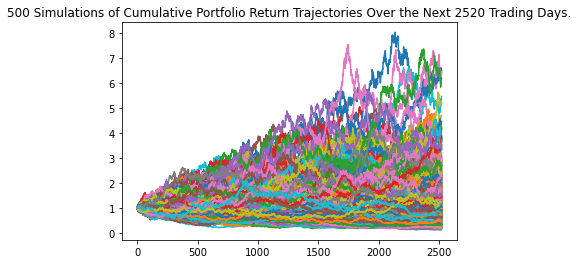

In [98]:
# Plot simulation outcomes
MC_shares_10.plot_simulation()

In [99]:
# Plot probability distribution and confidence intervals
MC_shares_10.plot_distribution()

SyntaxError: invalid syntax (<ipython-input-99-ec190270b8ff>, line 2)

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
Summary_2 = MC_shares_10.summarize_cumulative_return()

# Print summary statistics
Summary_2

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_10 = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(Summary[8]*initial_investment_10, 2)
ci_upper_10 = round(Summary[9]*initial_investment_10, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
